#Logistic Regression

**Logistic regression** is a statistical method for predicting binary classes.

**Logistic regression** use sigmoid function. <p>
The **sigmoid function**, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. <p>
If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES(Good), and if it is less than 0.5, we can classify it as 0 or NO(Bad). 

## Dataset description

In this notebook, I took the red wine quality dataset, which contains information about the different parameters of wine.
Last column - is our target column which has number of wine quiality.

In [357]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [358]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

#Graph
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus


wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [360]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data preprocessing

Because of **Logistic regression** which predict binary classes we should prepare our "answers". So I split to **Bad** and **Good** quality of wine.<p>
Where quality <= 6 is **Bad** and quality >=7 is **Good**

In [361]:
wine_df['quality'].mask(wine_df['quality'] <= 6, -1, inplace=True)
wine_df['quality'].mask(wine_df['quality'] >= 7, 1, inplace=True)

In [362]:
wine_df.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,-1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,-1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,-1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,-1


## Split data to subsets

Here I split data to train and test sets.<p>
Train set contains 75% and test set contains 25% of data.<p>
Also I reset index for our subsets, because it will be easier to map model's coef with data.

In [363]:
wine_train_df, wine_test_df = train_test_split(wine_df, test_size=0.25)

In [364]:
X_train = wine_train_df.loc[:, wine_train_df.columns != 'quality']
y_train = wine_train_df['quality']

In [365]:
X_train.shape

(1199, 11)

In [366]:
y_train.shape

(1199,)

In [367]:
X_test = wine_test_df.loc[:, wine_test_df.columns != 'quality']
y_test = wine_test_df['quality']

In [368]:
X_test.shape

(400, 11)

In [369]:
y_test.shape

(400,)

In [370]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [371]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [372]:
y_test

0     -1
1     -1
2      1
3     -1
4     -1
      ..
395   -1
396   -1
397   -1
398   -1
399   -1
Name: quality, Length: 400, dtype: int64

## Model Training

Here I have simple model fit function for training.

Also I changed max itterations for model. Because of default 100 was not enough and throwed warning about it.

And I used magical function %time gives us a single run of a function

In [373]:
model = LogisticRegression(max_iter=1000)
%time model.fit(X_train,y_train)

CPU times: user 404 ms, sys: 603 ms, total: 1.01 s
Wall time: 836 ms


LogisticRegression(max_iter=1000)

Here I showed model coefficients for our features<p>
model.coef_ - Coefficient of the features in the decision function.

In [374]:
model.coef_[0]

array([ 0.02099571, -2.24456401,  0.69029816,  0.10442767, -1.024094  ,
        0.00272272, -0.01278608, -0.01898051, -0.58522121,  2.52661981,
        0.9711579 ])

## Model Results

I print prediction for our test set. And we can see result of our model.

In [375]:
y_pred = model.predict(X_test)
print(y_pred)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

I predicted the sentiment of test data reviews in terms of probability.<p>
I used predict_proba function which using for probability estimates.<p>
And returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.<p>
For this example order of classes will be [-1,1]. It means thar first column will be for **bad** wine and second column for **good** wine

In [376]:
model.classes_

array([-1,  1])

In [377]:
y_test

0     -1
1     -1
2      1
3     -1
4     -1
      ..
395   -1
396   -1
397   -1
398   -1
399   -1
Name: quality, Length: 400, dtype: int64

In [378]:
pr_proba = model.predict_proba(X_test)
print(pr_proba)

[[0.96900348 0.03099652]
 [0.95527366 0.04472634]
 [0.71382019 0.28617981]
 [0.99031423 0.00968577]
 [0.71280563 0.28719437]
 [0.99112226 0.00887774]
 [0.81575737 0.18424263]
 [0.98173962 0.01826038]
 [0.79365817 0.20634183]
 [0.63462642 0.36537358]
 [0.84157078 0.15842922]
 [0.65236871 0.34763129]
 [0.94723715 0.05276285]
 [0.51788884 0.48211116]
 [0.98498172 0.01501828]
 [0.75983901 0.24016099]
 [0.45698548 0.54301452]
 [0.98247228 0.01752772]
 [0.94163411 0.05836589]
 [0.79216269 0.20783731]
 [0.29117341 0.70882659]
 [0.87990321 0.12009679]
 [0.98641307 0.01358693]
 [0.98566853 0.01433147]
 [0.9628863  0.0371137 ]
 [0.98849308 0.01150692]
 [0.99004768 0.00995232]
 [0.98813465 0.01186535]
 [0.72466667 0.27533333]
 [0.85469142 0.14530858]
 [0.98194347 0.01805653]
 [0.904932   0.095068  ]
 [0.93188462 0.06811538]
 [0.59898454 0.40101546]
 [0.98819677 0.01180323]
 [0.98645649 0.01354351]
 [0.91405064 0.08594936]
 [0.97767267 0.02232733]
 [0.99490735 0.00509265]
 [0.94608073 0.05391927]


Here I mapped index to element in dataset and show TOP 5 Bad wine's parameters and TOP 5 Good wine's

In [379]:
ids_bad = np.arange(pr_proba[:, 0].shape[0])
res_bad = sorted(ids_bad, key=lambda x: pr_proba[:, 0][x])
ids_good = np.arange(pr_proba[:, 1].shape[0])
res_good = sorted(ids_good, key=lambda x: pr_proba[:, 1][x])

In [380]:
print('Bad wine')
for index in res_bad[-5:]:
    print(f"{X_test.iloc[index]} \n")

Bad wine
fixed acidity            7.0000
volatile acidity         0.6900
citric acid              0.0800
residual sugar           1.8000
chlorides                0.0970
free sulfur dioxide     22.0000
total sulfur dioxide    89.0000
density                  0.9959
pH                       3.3400
sulphates                0.5400
alcohol                  9.2000
Name: 327, dtype: float64 

fixed acidity            7.00000
volatile acidity         0.97500
citric acid              0.04000
residual sugar           2.00000
chlorides                0.08700
free sulfur dioxide     12.00000
total sulfur dioxide    67.00000
density                  0.99565
pH                       3.35000
sulphates                0.60000
alcohol                  9.40000
Name: 378, dtype: float64 

fixed acidity           7.9000
volatile acidity        0.8850
citric acid             0.0300
residual sugar          1.8000
chlorides               0.0580
free sulfur dioxide     4.0000
total sulfur dioxide    8.0000
den

In [381]:
print('Good wine:')
for index in res_good[-5:]:
    print(f"{X_test.iloc[index]}\n")

Good wine:
fixed acidity            4.90000
volatile acidity         0.42000
citric acid              0.00000
residual sugar           2.10000
chlorides                0.04800
free sulfur dioxide     16.00000
total sulfur dioxide    42.00000
density                  0.99154
pH                       3.71000
sulphates                0.74000
alcohol                 14.00000
Name: 165, dtype: float64

fixed acidity            5.0000
volatile acidity         0.4200
citric acid              0.2400
residual sugar           2.0000
chlorides                0.0600
free sulfur dioxide     19.0000
total sulfur dioxide    50.0000
density                  0.9917
pH                       3.7200
sulphates                0.7400
alcohol                 14.0000
Name: 332, dtype: float64

fixed acidity            9.2000
volatile acidity         0.4100
citric acid              0.5000
residual sugar           2.5000
chlorides                0.0550
free sulfur dioxide     12.0000
total sulfur dioxide    25.0

Here I calculate the accuracy of predictions. Function score returns the mean accuracy on the given test data and labels.

In [382]:
model.score(X_test, y_test)

0.8925

Here I decided to add confusion matrix. <p>
A confusion matrix is a table that is used to evaluate the performance of a classification model. <p> The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.
<p> 
Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.

In [383]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[344,   6],
       [ 37,  13]])

Here visualizing of confusion Matrix

Text(0.5, 257.44, 'Predicted label')

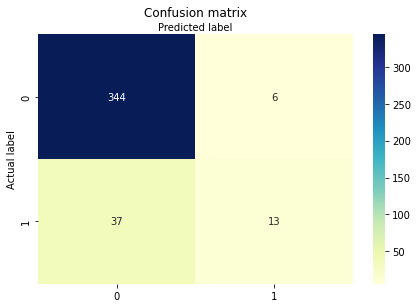

In [384]:
class_names=[-1, 1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


We got a classification rate about **87%**. It's a good accuracy.<p>
**Precision** is about being precise, how accurate your model is.<p>
**Recall** if we have Bad wine model can identify it 97% if the time.

In [385]:
target_names = ['Bad', 'Good']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.90      0.98      0.94       350
        Good       0.68      0.26      0.38        50

    accuracy                           0.89       400
   macro avg       0.79      0.62      0.66       400
weighted avg       0.88      0.89      0.87       400



Here I decided add ROC curve<p>
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.<p>
AUC score for the case about 0.84. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

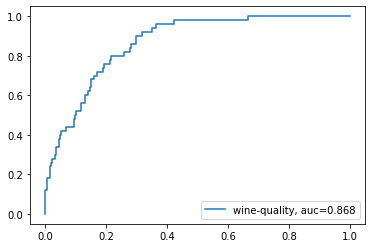

In [386]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="wine-quality, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree

Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.<p>
A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the result.

Decision tree lerns to partition on the basis of the attribute value using recursive partitioning. 

The time complexity of decision trees is a function of the number of records and number of attributes in the given data. 

Here I split data to train and test sets. And reset indexes.

In [387]:
wine_train_df, wine_test_df = train_test_split(wine_df, test_size=0.25)

In [388]:
X_train = wine_train_df.loc[:, wine_train_df.columns != 'quality']
feature_cols = X_train.columns
y_train = wine_train_df['quality']

I created feature_cols which contains names of features for dree curve.

In [389]:
feature_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [390]:
X_test = wine_test_df.loc[:, wine_test_df.columns != 'quality']
y_test = wine_test_df['quality']

In [391]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [392]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

For create model I used DecisionTreeClassifier from sklearn. <p>
And have common steps for fitting and predicting.

In [393]:
clf_model = DecisionTreeClassifier()

clf_model = %time clf_model.fit(X_train,y_train)

y_pred = clf_model.predict(X_test)

CPU times: user 11.3 ms, sys: 170 µs, total: 11.5 ms
Wall time: 14.2 ms


We have accuracy about 87%, the same as Logistic Regression.

In [394]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8925


Here I create graph for decision tree model. And we can see topmost element - root of tree. Adn all decision tree.<p>
Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand.

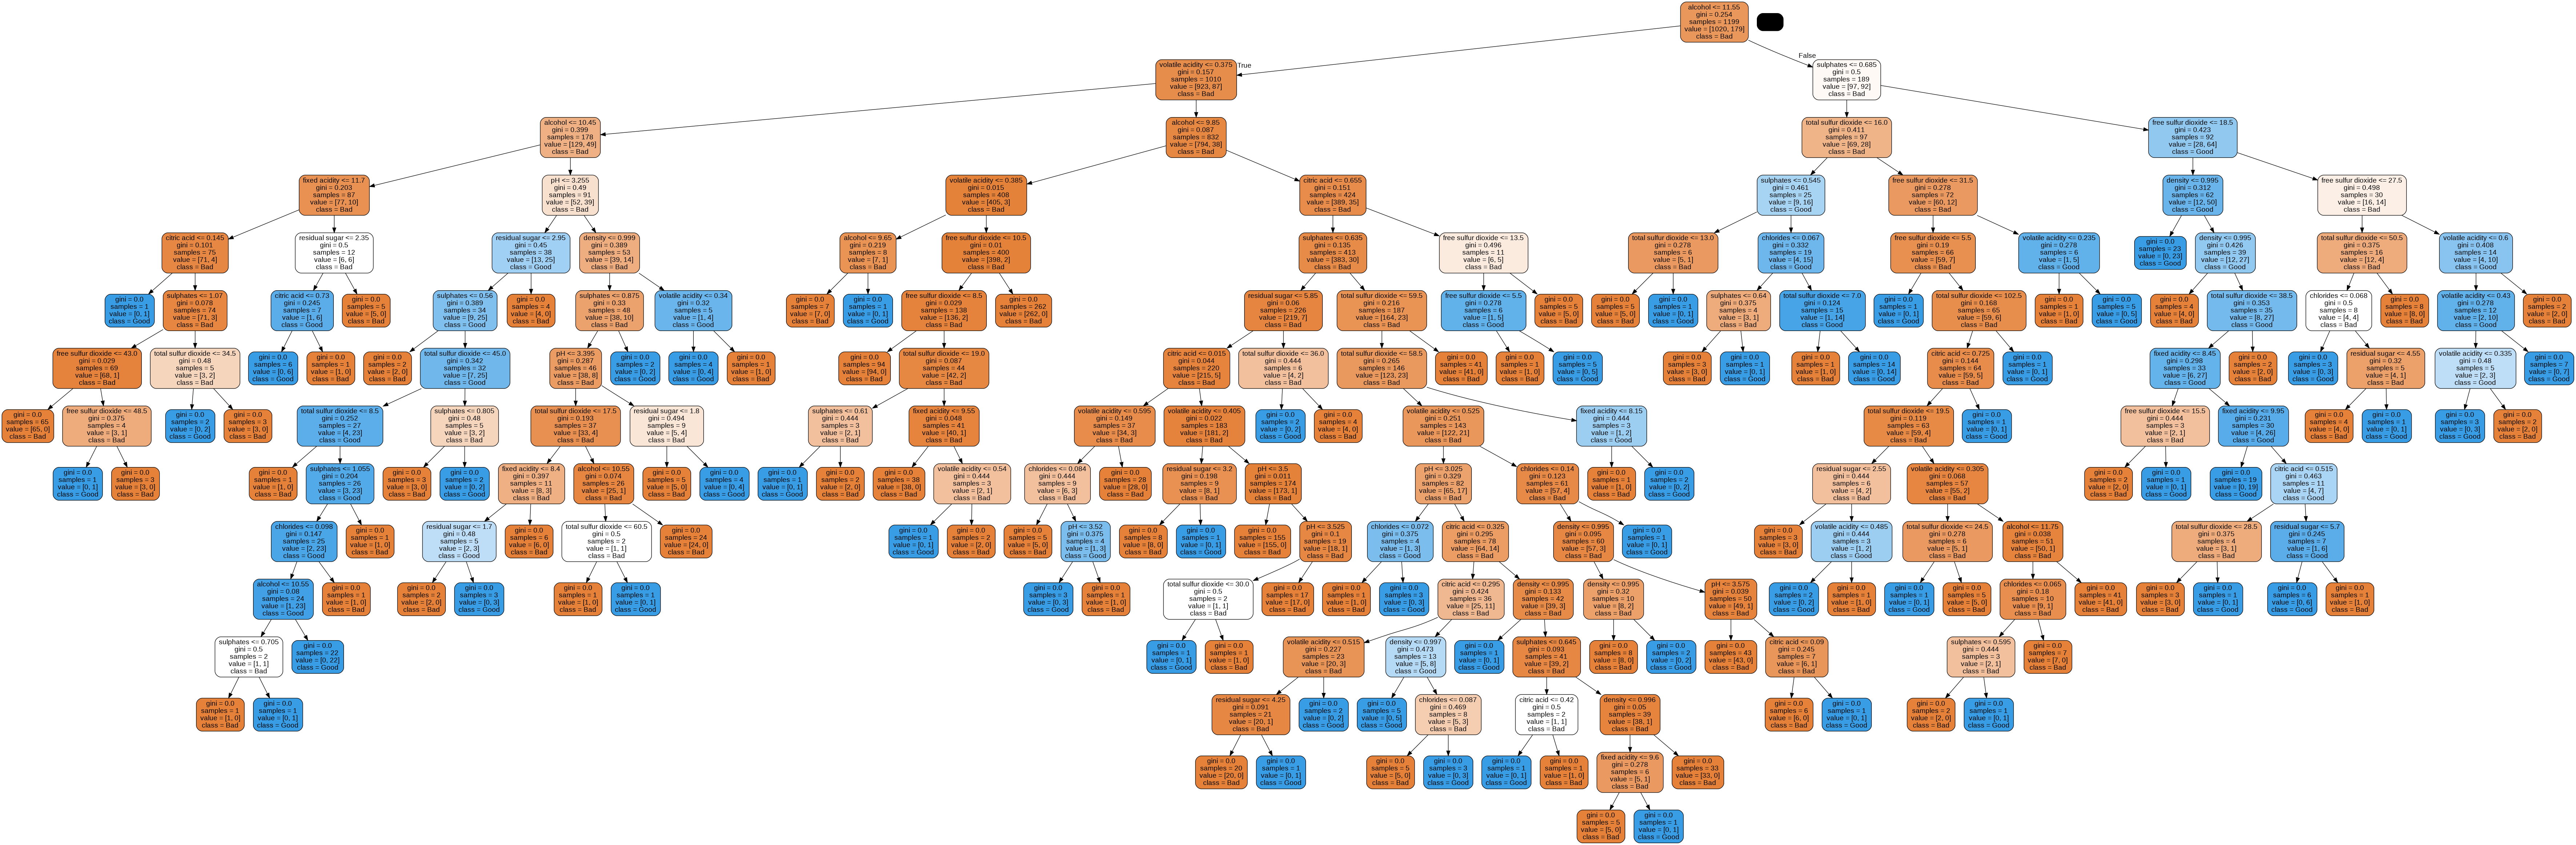

In [395]:
dot_data = StringIO()
export_graphviz(clf_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False,feature_names = feature_cols,class_names=['Bad','Good'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Here I decieded try to optimize a lit bit this model bu adding max depth of out tree.

In [396]:
clf_model = DecisionTreeClassifier(max_depth=5)

clf_model = %time clf_model.fit(X_train,y_train)

y_pred = clf_model.predict(X_test)

CPU times: user 12.9 ms, sys: 1.11 ms, total: 14 ms
Wall time: 22.6 ms


In [397]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9225


This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

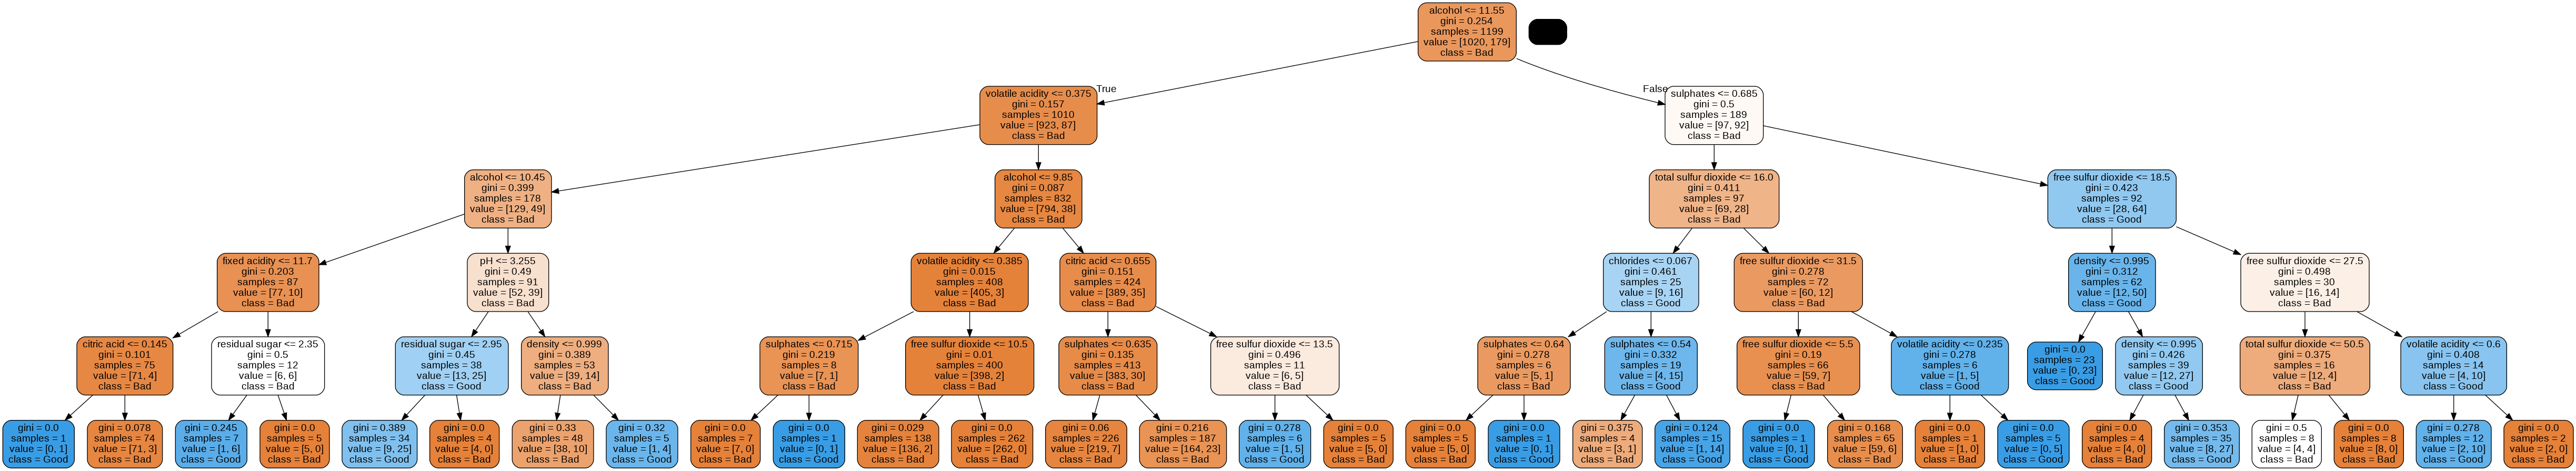

In [398]:
dot_data = StringIO()
export_graphviz(clf_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False,feature_names = feature_cols,class_names=['Bad','Good'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Conclusion
We can compare two models:
 - Logistic Regression with accuracy about 87% and 836 ms time
 - Decision tree with accuracy about 87% too and 14.2 ms time 

They have the same results but we can use them for different data. For example decision tree model sensitive to noisy data and it can overfit it. And small variation in data could be reason of bad results.